# Programming Assignment - 9
---
## Name:
---

In [45]:
# Import required packages

from __future__ import print_function
from __future__ import division 

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## Question 1
---
Set up a linear regression model for the miles per gallon on the data at automobile [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/).  Discard the categorical data.

>1. Get feature matrix X, and target variable y.
>1. Split data into training and testing.
>1. Normalize data using MinMaxScaler.
>1. Creat a LinearRegression object for modeling.
>1. Train the model with training data.
>1. Look at R^2 score for the goodness of fit for the train and test data.
>1. Present a graphical comparison of true and observed responses for the test data.

In [26]:
# Your code comes here
#url = "https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29"
col_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'] #Names
df=pd.read_fwf("auto-mpg.data",names=col_names,sep=',')
del df['horsepower']
del df['car name']
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1


In [27]:
#Get feature matrix X, and target variable y.
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
print(X)

     cylinders  displacement  weight  acceleration  model year  origin
0            8         307.0  3504.0          12.0          70       1
1            8         350.0  3693.0          11.5          70       1
2            8         318.0  3436.0          11.0          70       1
3            8         304.0  3433.0          12.0          70       1
4            8         302.0  3449.0          10.5          70       1
..         ...           ...     ...           ...         ...     ...
393          4         140.0  2790.0          15.6          82       1
394          4          97.0  2130.0          24.6          82       2
395          4         135.0  2295.0          11.6          82       1
396          4         120.0  2625.0          18.6          82       1
397          4         119.0  2720.0          19.4          82       1

[398 rows x 6 columns]


In [6]:
#Split data into training and testing.
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=100)

In [7]:
#Normalize data using MinMaxScaler.
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_n = normalizer.transform(X_train)
X_test_n = normalizer.transform(X_test) 

In [8]:
#Creat a LinearRegression object for modeling.
linreg = LinearRegression()

In [9]:
#Train the model with training data.
linreg = LinearRegression()
linreg.fit(X_train_n, y_train)

LinearRegression()

In [10]:
#Look at R^2 score for the goodness of fit for the train and test data.
print (linreg.score(X_train_n, y_train))
print (linreg.score(X_test_n, y_test))

0.8156087992251562
0.8320201841904361


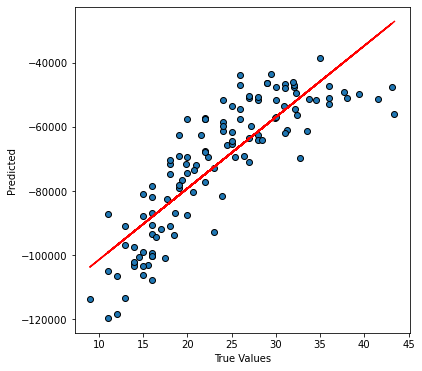

In [15]:
#Present a graphical comparison of true and observed responses for the test data.
y_pred = linreg.predict(X_test)
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
z=np.polyfit(y_test,y_pred,1)
p=np.poly1d(z)
ax.plot(y_test,p(y_test),'--r')
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')
plt.show()

## Question 2
---
Setup a logistic regression model on the data at [adultUCI](http://archive.ics.uci.edu/ml/datasets/Adult).  Discuss the performance of your model using appropriate statistics. Use dummy variables to handle categorical variables. 

1. Prepare the data. Create dummy variables for categorical variables. [See this](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)
2. Get feature matrix X, and target variable y (>50k or <50k)
3. Split data into training and testing
4. Normalize data using MinMaxScaler
5. Creat a LogisticRegression object for modeling
6. Train the model with training data
7. Compare the precision, recall, and F1-score on the train and test data.

In [31]:
# Your code comes here

col_names = ['age','workclass','fnlwgt','education','education_num','martial_status','occupation','relationship',
            'race','sex','capital_gain','capital_loss','hours_per_week','native-country','salary'] #Names
df=pd.read_csv("adult.data",names=col_names,sep=',')

In [32]:
#Prepare the data. Create dummy variables for categorical variables
df = pd.concat([df,pd.get_dummies(df['workclass'], prefix='workclass')],axis=1)
df.drop(['workclass'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['fnlwgt'], prefix='fnlwgt')],axis=1)
df.drop(['fnlwgt'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['martial_status'], prefix='martial_status')],axis=1)
df.drop(['martial_status'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['occupation'], prefix='occupation')],axis=1)
df.drop(['occupation'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['relationship'], prefix='relationship')],axis=1)
df.drop(['relationship'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['race'], prefix='race')],axis=1)
df.drop(['race'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['sex'], prefix='sex')],axis=1)
df.drop(['sex'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['native-country'], prefix='native-country')],axis=1)
df.drop(['native-country'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['salary'], prefix='salary')],axis=1)
df.drop(['salary'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['education'], prefix='education')],axis=1)
df.drop(['education'],axis=1, inplace=True)


In [33]:
df.dtypes

age                        int64
education_num              int64
capital_gain               int64
capital_loss               int64
hours_per_week             int64
                           ...  
education_ HS-grad         uint8
education_ Masters         uint8
education_ Preschool       uint8
education_ Prof-school     uint8
education_ Some-college    uint8
Length: 21757, dtype: object

In [34]:
#Get feature matrix X, and target variable y (>50k or <50k)
X=df.iloc[:, :-1]
y = df["salary_ >50K"]

In [35]:
#Split data into training and testingSplit data into training and testing
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=100)

In [36]:
#Normalize data using MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

In [39]:
#Creat a LogisticRegression object for modeling
lrc = LogisticRegression(C=1.0, max_iter=1000, tol=0.00001)

In [41]:
#Train the model with training data
lrc.fit(X_train_n, y_train)

LogisticRegression(max_iter=1000, tol=1e-05)

In [46]:
#Compare the precision, recall, and F1-score on the train and test data.
conf_matrix = confusion_matrix(y_test,lrc.predict(X_test_n))
print (conf_matrix)
class_report = classification_report(y_test,lrc.predict(X_test_n))
print (class_report)

[[7428    0]
 [   0 2341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7428
           1       1.00      1.00      1.00      2341

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769

